<a href="https://colab.research.google.com/github/dnzambuli/CSI2020-classwork/blob/master/convoluted_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
sns.set(font_scale = 2)

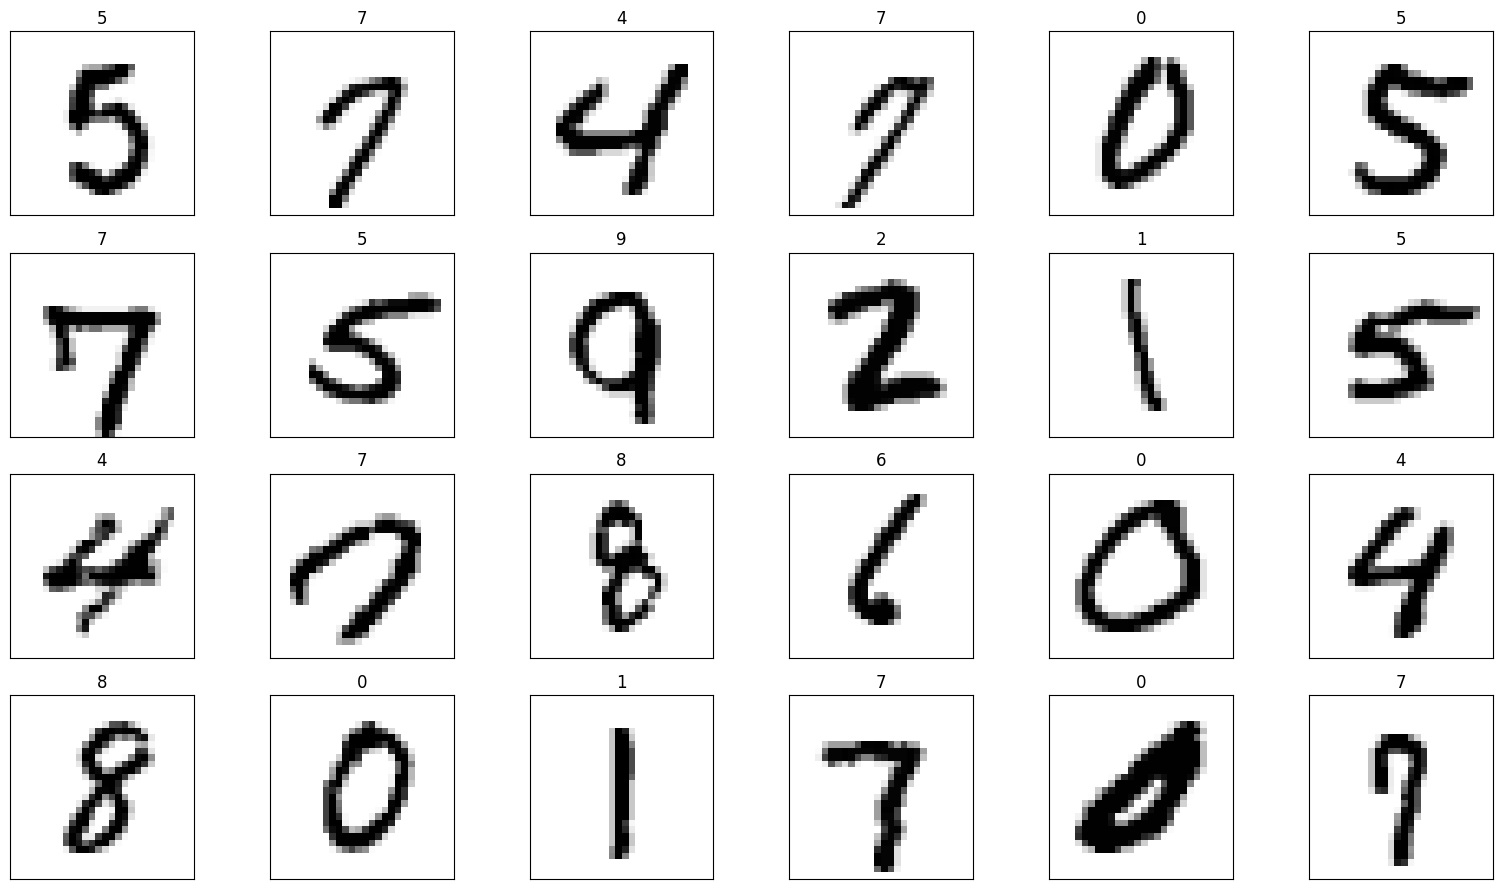

In [8]:
index = np.random.choice(np.arange(len(x_train)), 24, replace = False)
figure, axes =plt.subplots(nrows=4, ncols= 6, figsize = (16,9))

for item in zip(axes.ravel(), x_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap ='gray_r')
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)

plt.tight_layout()

## Data Preparation

```
(width, height, channels) -> keras
```
Height = Width = 28

pixels -- 1

channels = 0 - 255

**One Channel** for each color black, as in
```
(28, 28, 1)
```

In [9]:
x_train = x_train.reshape((60000, 28, 28, 1))

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test = x_test.reshape((10000, 28, 28, 1))

In [12]:
x_test.shape

(10000, 28, 28, 1)

In [13]:
x_train = x_train.astype('float32')/ 255

In [14]:
x_train[0].shape

(28, 28, 1)

In [15]:
x_test = x_test.astype('float32')/255

In [16]:
x_test.shape

(10000, 28, 28, 1)

In [17]:
y_train[5]

2

## One Hot Encoding
converts data into arrays of ``0's`` anf ``1's``

- only one = 1 the rest are 0

```
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
```

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_train.shape

(60000, 10)

In [21]:
# creating neural network
from tensorflow.keras.models import Sequential
# feed forward - output of 1 ayer will be output of the next

In [22]:
cnn= Sequential()

In [23]:
cnn

In [26]:
from tensorflow.keras.layers import  Conv2D, Dense, Flatten, MaxPooling2D

In [28]:
cnn.add(Conv2D(filters= 64, kernel_size =(3,3), activation = 'relu', input_shape = (28, 28, 1)))

In [29]:
28 * 28

784

In [30]:
26 * 26 * 64

43264

In [31]:
# max polling
# looking at a cell take max
cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [32]:
cnn.add(Conv2D(filters= 128, kernel_size =(3,3), activation = 'relu'))

In [33]:
cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [34]:
cnn.add(Flatten())

In [35]:
# relationship between digits
# dense layer network
cnn.add(Dense(units= 128, activation = 'relu'))

In [36]:
cnn.add(Dense(units= 10, activation = 'softmax'))

In [37]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [39]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

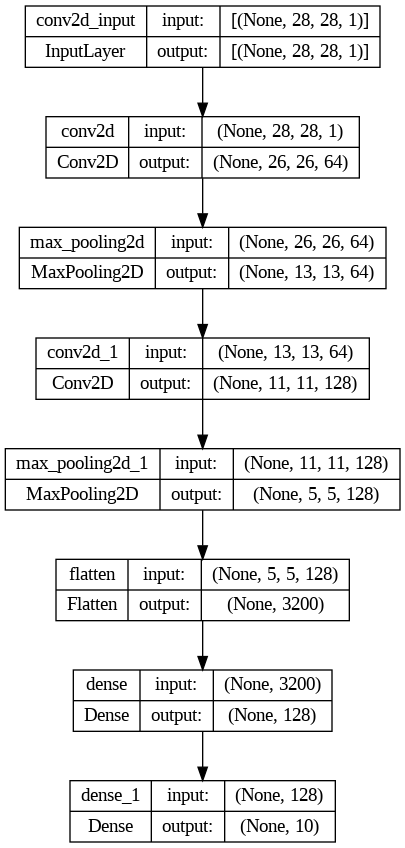

In [41]:
plot_model(cnn, to_file = 'convonet.png', show_shapes = True, show_layer_names= True)
Image(filename = 'convonet.png')